# Molecular Modelling Exercises

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Getting started with RDKit

RDKit is an Open-Source Chem(o)informatics and Machine Learning Library that supports C++ and Python. It implements many features, that you have learned about in the lecture. Find more informations here: https://www.rdkit.org/docs/GettingStartedInPython.html

In [112]:
import functools as fn

from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdFMCS
from rdkit.Chem.Draw import IPythonConsole, SimilarityMaps
import pandas as pd

from PIL import Image


Here is an example showcasing how a molecule can be read in from a SMILES and represented in Python.

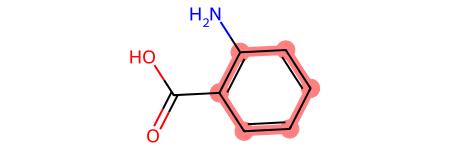

In [113]:
mol = Chem.MolFromSmiles('c1cc(C(=O)O)c(N)cc1')
mol.__sssAtoms = [0, 1, 2, 6, 8, 9]
mol

The similarity of two molecules can quickly be visualized using Fingerprints and SimilarityMaps.

In [114]:
mol2 = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(mol, mol2, SimilarityMaps.GetMorganFingerprint, draw2d=Draw.MolDraw2DSVG, size=(150, 150))

[17:16:29] DEPRECATION WARNING: please use MorganGenerator
[17:16:29] DEPRECATION WARNING: please use MorganGenerator


ArgumentError: Python argument types in
    MolDraw2D.ClearDrawing()
did not match C++ signature:
    ClearDrawing(RDKit::MolDraw2D {lvalue} self)

## Loading data

We are able to import a molecule in different ways: either as smiles or as a '.mol' file. Try it with a smiles of your choice. And let python draw the molecule. Does it look like you expect it?

<details>
<summary>Click for a tip</summary>
Look at the RDKit manual for converting Smiles to molecules.
</details>
<details>
<summary>Click for a tip</summary>
Drawing is possible by just writing the name of the variable defined.
</details>

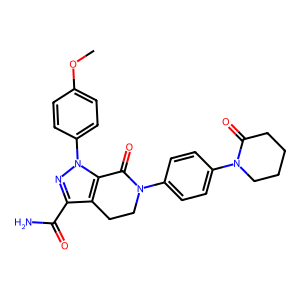

In [22]:
apixaban = "COC1=CC=C(C=C1)N2C3=C(CCN(C3=O)C4=CC=C(C=C4)N5CCCCC5=O)C(=N2)C(=O)N"
mol = Chem.MolFromSmiles(apixaban)

# Draw the molecule

img = Draw.MolToImage(mol)
img

Nevertheless, we can also convert a molecule to a smiles. Try to convert different versions of smiles to a molecule and then back to smiles again.

In [32]:
# 

apixaban_smiles1 = "COC1=CC=C(C=C1)N2C3=C(CCN(C3=O)C4=CC=C(C=C4)N5CCCCC5=O)C(=N2)C(=O)N"
apixaban_smiles2= "COc1ccc(-n2nc(C(N)=O)c3c2C(=O)N(c2ccc(N4CCCCC4=O)cc2)CC3)cc1"
apixaban_smiles3 = "COc1ccc(cc1)n2c3c(c(n2)C(=O)N)CCN(C3=O)c4ccc(cc4)N5CCCCC5=O"

mol1, mol2, mol3 = Chem.MolFromSmiles(apixaban_smiles1), Chem.MolFromSmiles(apixaban_smiles2), Chem.MolFromSmiles(apixaban_smiles3)

print("Smiles Variant 1: ", Chem.MolToSmiles(mol1))
print("Smiles Variant 2: ", Chem.MolToSmiles(mol2))
print("Smiles Variant 3:", Chem.MolToSmiles(mol3))


Smiles Variant 1:  COc1ccc(-n2nc(C(N)=O)c3c2C(=O)N(c2ccc(N4CCCCC4=O)cc2)CC3)cc1
Smiles Variant 2:  COc1ccc(-n2nc(C(N)=O)c3c2C(=O)N(c2ccc(N4CCCCC4=O)cc2)CC3)cc1
Smiles Variant 3: COc1ccc(-n2nc(C(N)=O)c3c2C(=O)N(c2ccc(N4CCCCC4=O)cc2)CC3)cc1


Q: What do you witness when transforming back and forth between smiles - mol - smiles?

YOUR ANSWER HERE

But it would be really annoying, if we would have to load every molecule one by one. However, we can bypass this issue with our good friend `pandas`. Give it a try with the 'drug.smi' file and try to visualize each smiles.

<details>
<summary>Click for a tip</summary>
Use pd.read_csv(csv_file)    
(check the pandas documentation if you are confused: <a>https://pandas.pydata.org/docs/</a> )
</details>
<details>
<summary>Click for a tip</summary>
Use either apply or a for-loop to draw the molecules, selecting the correct column. Something with for every smile in the smiles column.
</details>

In [130]:
nice_molecules = pd.read_csv("drugs.smi",sep=",",names=["idx","name","smiles"])

mol_list = []
for index, row in nice_molecules.iterrows():
    #name = row["name"]
    mol_list.append((Chem.MolFromSmiles(str(row["smiles"]))))

cleaned = [item for item in mol_list if item is not None]



[17:23:53] SMILES Parse Error: syntax error while parsing: smiles
[17:23:53] SMILES Parse Error: check for mistakes around position 2:
[17:23:53] smiles
[17:23:53] ~^
[17:23:53] SMILES Parse Error: Failed parsing SMILES 'smiles' for input: 'smiles'
[17:23:53] Unusual charge on atom 0 number of radical electrons set to zero


## Substructure search

To be able to look for common substructures you first have to define a suitable substructure. Give it a try and represent possible templates as smiles and structures.

<details>
<summary>Click for a tip</summary>
What would be chemical substructures that are suitable for this search? Maybe something like an amid? Do you know anything else?
</details>
<details>
<summary>Click for a tip</summary>
How do the smiles of your substructure look like?
</details>

In [131]:
substructure_dict = {"Alkane": "CC",
                     "Alkene": "C=C",
                     "Alkyne": "C#C",
                     "Alcohol": "CO",
                     "Aldehyd": "C=O",
                     "Ketone": "CC(=O)C",
                     "Carboxylic Acid": "C(=O)O",
                     "Amide": "C(=O)N",
                     "Pteridin": "C1=CN=C2C(=N1)C=NC=N2"
                     }

### Exercise:

_1)_ Try to find out how many structures in 'drug.smi' have an amide. How many of the molecules have a pteridin? Visualize all molecules that have __both__ of these substructures and show the names.

<details>
<summary>Click for a tip</summary>
Use a for-loop to look for the substructure in the database with `HasSubstructMatch`. Look for the molecules in the right column of your DataFrame and try to write it into a new column.
</details>
<details>
<summary>Click for a tip</summary>
If both (amide and pteridine) has to be true, you can combine it with and logical 'and'.
</details>
<details>
<summary>Click for a tip</summary>
With the `pandas` commands `loc` or `drop` (for example) you can define a new DataFrame containing the structures which include the substructures.
</details>
<details>
<summary>Click for a tip</summary>
Use the command Draw.MolsToGridImage and enter the values of the drawn molecule column. Names can be added via a list as legend.
</details>

[<rdkit.Chem.rdchem.Mol object at 0x172f36730>, <rdkit.Chem.rdchem.Mol object at 0x173160120>, <rdkit.Chem.rdchem.Mol object at 0x1731cf1b0>, <rdkit.Chem.rdchem.Mol object at 0x17319ff40>, <rdkit.Chem.rdchem.Mol object at 0x1731a7680>, <rdkit.Chem.rdchem.Mol object at 0x1731ae9d0>, <rdkit.Chem.rdchem.Mol object at 0x1731b1d20>, <rdkit.Chem.rdchem.Mol object at 0x173218040>]


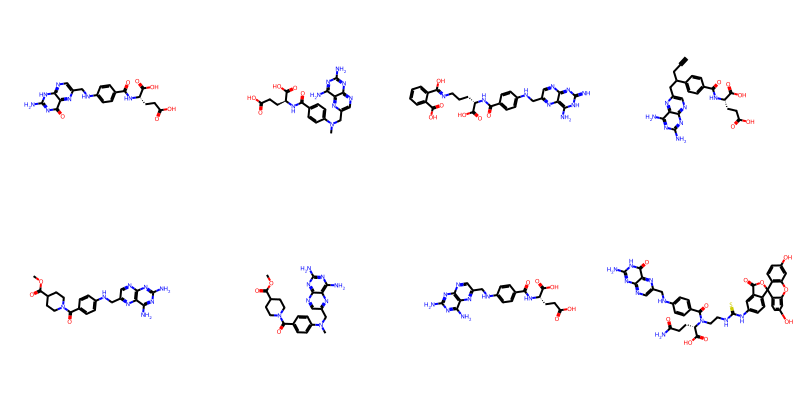

In [133]:
pattern1 = substructure_dict["Amide"]
pattern2 = substructure_dict["Pteridin"]

pattern1_mol = Chem.MolFromSmiles(pattern1)
pattern2_mol = Chem.MolFromSmiles(pattern2)

hits = []
for idx,elem in enumerate(cleaned):
    if elem.HasSubstructMatch(pattern1_mol) and elem.HasSubstructMatch(pattern2_mol):
        hits.append(elem)

print(hits)

img=Draw.MolsToGridImage(hits,molsPerRow=4,subImgSize=(200,200))  

# Image cannot be safter
img


_2)_ What is the largest common substructure of the now identified molecules (`from rdkit.Chem import rdFMCS`)? Differ between 'naive largest substructure' and substructures with complete rings (`ringMatchesRingOnly`).

<details>
<summary>Click for a tip</summary>
With 'FindMCS' you can determine the largest substructure of the values of your new defined list.
</details>
<details>
<summary>Click for a tip</summary>
Over smarts you can get to a visualization. Have for that a closer look at the RDKit documentation.
</details>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Q: What is the largest common Substructure?

YOUR ANSWER HERE